In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd
import cv2
from glob import glob 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math
import pandas as pd
import os

**1. Import the data. Analyse the dimensions of the data. Visualise the data.**

In [ ]:
# load Plant Seedling Classification Data
!ls "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data"

'Seedling - Prediction'   test	 train


**Loading the Training & Testing Images**

In [ ]:
# Loading train & test data
pathToTrain = "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/train"
testPath = "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/test"

**Importing the Libraries**

In [ ]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
#Assigning to List
listing = os.listdir( pathToTrain ) 
#Calculating No of Folders in train data
num_folders = len(listing)
#Print the data
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
#Scaling the image size
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/train/" + imgFolder + '/'
  files = os.listdir(path) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

12
Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet
70.20884013175964  seconds


In [ ]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [ ]:
# check the length of the training images for confirmation
len(trainImgNParray)

4767

In [ ]:
# check the length of labels for confirmation
len(trainlabel)

4767

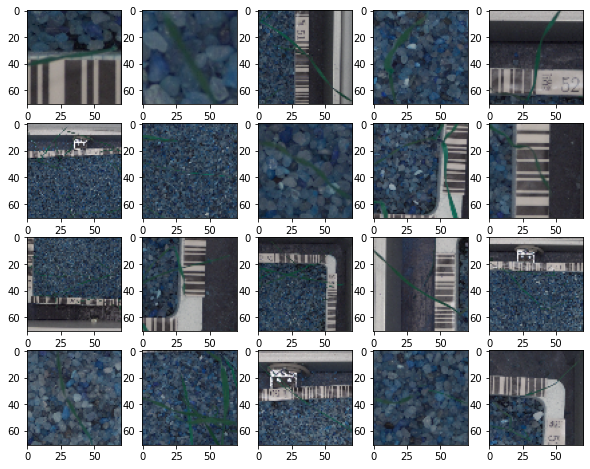

In [ ]:
# displaying training images
plt.rcParams['figure.figsize'] = (10.0,8.0)
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(trainImg[i])

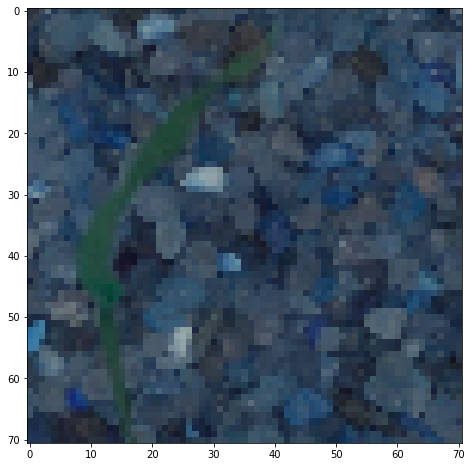

In [ ]:
# displaying random image
plt.imshow(trainImg[3])

In [ ]:
# shape of image
im = trainImg[3]
im.shape

(71, 71, 3)

In [ ]:
# array shape of image
trainImgNParray.shape

(4767, 71, 71, 3)

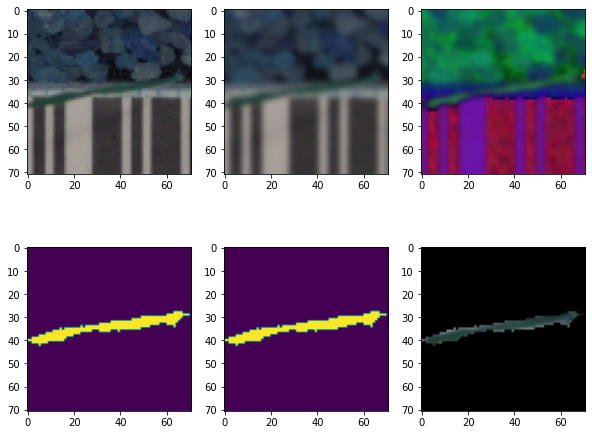

In [ ]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

In [ ]:
# normalize the training data
clearTrainImg = clearTrainImg/255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


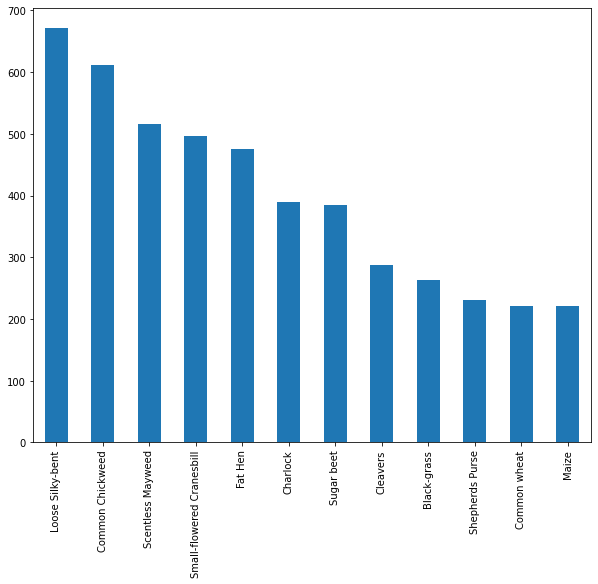

In [ ]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [ ]:
# check the data type of the training images
clearTrainImg.dtype

dtype('float64')

**2. Train tune and test AIML image classifier model using:**

**• Use supervised learning algorithms for training**

**• Use neural networks for training**

**• Use CNN for training**

In [ ]:
from sklearn.model_selection import train_test_split
# I used a 90% - 10% test train split, stratified according to training labels
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

SL_Train_X,SL_Valid_X,SL_Train_Y,SL_Valid_Y= train_test_split( trainX , trainY ,test_size=0.1,random_state=seed)

**• Use supervised learning algorithms for training**

In [ ]:
#Flatten the Image

# Train data
x_train_SL = []
for i in range(3861):
      x_train_SL.append(SL_Train_X[i,:].flatten())

# Test data
x_test_SL = []
for i in range(429):
      x_test_SL.append(SL_Valid_X[i,:].flatten())


# Shape of data

print("\n Training data",len(x_train_SL))
print("\n Training Target data",len(SL_Train_Y))
print("\n Test data",len(x_test_SL))
print("\n Testing target data",len(SL_Valid_Y))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier(n_estimators=100, 
                                  criterion='gini', 
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, 
                                  max_features='auto',
                                  max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None, 
                                  bootstrap=True, 
                                  oob_score=False, 
                                  n_jobs=None, 
                                  random_state=None, 
                                  verbose=0, 
                                  warm_start=False,
                                  class_weight=None,
                                  ccp_alpha=0.0, 
                                  max_samples=None)
model_RF.fit(x_train_SL, SL_Train_Y)

#Accuracy
pred_RF = model_RF.predict(x_test_SL)
RF_Train = model_RF.score(x_train_SL,SL_Train_Y)
RF_Test = accuracy_score(SL_Valid_Y,pred_RF)     


print("\nRandom Forest: Train Accuracy",RF_Train)
print("\nRandom Forest: Test Accuracy",RF_Test)


 Training data 3861

 Training Target data 3861

 Test data 429

 Testing target data 429

Random Forest: Train Accuracy 0.9997409997409997

Random Forest: Test Accuracy 0.27972027972027974


**• Use neural networks for training**

In [ ]:
# Neural Network Classifier

NN_train_X=trainX.reshape(trainX.shape[0],15123)
NN_test_X=testX.reshape(testX.shape[0],15123)


#Normalising
NN_train_X = NN_train_X/255.0
NN_test_X = NN_test_X/255.0


print('Training Set',NN_train_X.shape,trainY.shape)
print('Test Set',NN_test_X.shape,testY.shape)

from keras.utils import np_utils
NN_y_train = np_utils.to_categorical(trainY)
NN_y_test = np_utils.to_categorical(testY)

num_classes = NN_y_test.shape[1]

#Model Creation

import keras
from keras import  losses
from keras import optimizers
from keras.layers import  Dropout,MaxPooling2D
from keras.layers import  BatchNormalization
from keras.models import  Sequential
from keras.layers import Dense


def nn_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(15123,)))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(layers.Dense(num_clases, activation='softmax'))

    #model Compile
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss = losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
    return model

model= nn_model()

model.fit(NN_train_X, trainY, validation_data = (NN_test_X,testY), epochs=50, batch_size=200, verbose=2)

Training Set (4290, 15123) (4290, 12)
Test Set (477, 15123) (477, 12)
Epoch 1/50
22/22 - 2s - loss: 2.2316 - accuracy: 0.2744 - val_loss: 2.5062 - val_accuracy: 0.1614
Epoch 2/50
22/22 - 1s - loss: 1.7375 - accuracy: 0.4056 - val_loss: 2.6597 - val_accuracy: 0.1426
Epoch 3/50
22/22 - 1s - loss: 1.5748 - accuracy: 0.4627 - val_loss: 2.7735 - val_accuracy: 0.1090
Epoch 4/50
22/22 - 1s - loss: 1.4637 - accuracy: 0.4886 - val_loss: 2.7727 - val_accuracy: 0.0608
Epoch 5/50
22/22 - 1s - loss: 1.3733 - accuracy: 0.5247 - val_loss: 2.8920 - val_accuracy: 0.1279
Epoch 6/50
22/22 - 1s - loss: 1.3153 - accuracy: 0.5515 - val_loss: 2.9646 - val_accuracy: 0.1279
Epoch 7/50
22/22 - 1s - loss: 1.2363 - accuracy: 0.5760 - val_loss: 2.7261 - val_accuracy: 0.0922
Epoch 8/50
22/22 - 1s - loss: 1.1685 - accuracy: 0.6023 - val_loss: 2.9257 - val_accuracy: 0.1279
Epoch 9/50
22/22 - 1s - loss: 1.1374 - accuracy: 0.6063 - val_loss: 2.9777 - val_accuracy: 0.1761
Epoch 10/50
22/22 - 1s - loss: 1.1267 - accuracy

In [ ]:
# importing ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=True
    )  
datagen.fit(trainX)

**• Use CNN for training**

In [ ]:
CNN_model = Sequential() 
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
CNN_model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Flatten()) 
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(num_clases, activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

CNN_model_A = CNN_model
CNN_model_A.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [ ]:
t0=time.time()
history_A = CNN_model_A.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = CNN_model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
58/58 - 46s - loss: 2.0545 - accuracy: 0.2802 - val_loss: 1.6757 - val_accuracy: 0.3753
Epoch 2/35
58/58 - 41s - loss: 1.5736 - accuracy: 0.4403 - val_loss: 1.3764 - val_accuracy: 0.5094
Epoch 3/35
58/58 - 41s - loss: 1.3741 - accuracy: 0.5186 - val_loss: 1.2139 - val_accuracy: 0.6080
Epoch 4/35
58/58 - 41s - loss: 1.2262 - accuracy: 0.5753 - val_loss: 1.1146 - val_accuracy: 0.6310
Epoch 5/35
58/58 - 41s - loss: 1.1343 - accuracy: 0.6119 - val_loss: 1.0774 - val_accuracy: 0.6373
Epoch 6/35
58/58 - 42s - loss: 1.0853 - accuracy: 0.6317 - val_loss: 1.0149 - val_accuracy: 0.6688
Epoch 7/35
58/58 - 41s - loss: 0.9850 - accuracy: 0.6678 - val_loss: 0.9462 - val_accuracy: 0.6834
Epoch 8/35
58/58 - 41s - loss: 0.9481 - accuracy: 0.6923 - val_loss: 0.8276 - val_accuracy: 0.7463
Epoch 9/35
58/58 - 41s - loss: 0.8579 - accuracy: 0.7128 - val_loss: 0.7973 - val_accuracy: 0.7589
Epoch 10/35
58/58 - 41s - loss: 0.8029 - accuracy: 0.7315 - val_loss: 0.7123 - val_accuracy: 0.7736
Epoch 11/

In [31]:
# Final evaluation of the model
scores = CNN_model_A.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 13.21%


In [32]:
print(CNN_model_A.evaluate(trainX, trainY))  # Evaluate on train set
print(CNN_model_A.evaluate(testX, testY))  # Evaluate on test set

135/135 [==============================] - 10s 73ms/step - loss: 0.3113 - accuracy: 0.8846
[0.3112654983997345, 0.8846153616905212]
15/15 [==============================] - 1s 73ms/step - loss: 0.3972 - accuracy: 0.8679
[0.3971727788448334, 0.8679245114326477]


**3. Compare the results from the above step along with your detailed observations.**

From the above we can say CNN has performed better compared to Supervised & Neutra Network.

CNN has better accuaracy compared to both Network

**4. Pickle the best performing model.**

In [33]:

from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = CNN_model_A.to_json()
with open("model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
CNN_model_A.save_weights("model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Saved model to disk
Loaded model from disk


**5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image
classifier model to predict the class.**

Image Width 578
Image Height 578


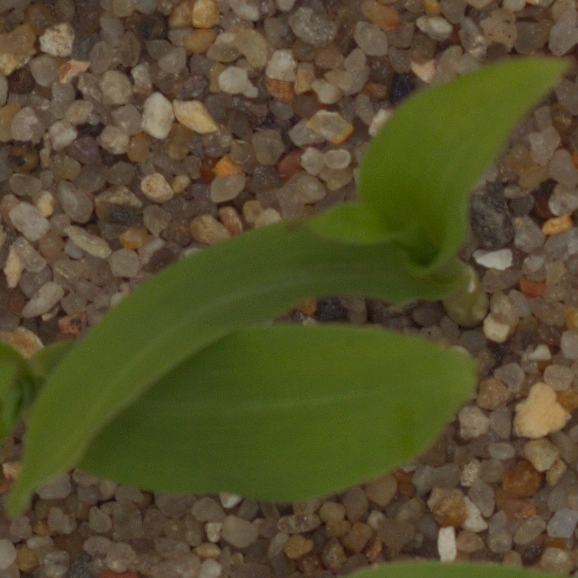

In [34]:
from PIL import  Image

Image_name = "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/Seedling - Prediction/Predict.png"
with Image.open(Image_name) as image:
  width,height=image.size
print("Image Width",width)
print("Image Height",height)
Image.open(Image_name)


In [37]:
global img
Image_name = "/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/Seedling - Prediction/Predict.png"
import cv2
img = cv2.imread(Image_name)
image=img.reshape(1,578,578,3)
image.shape
np.all(np.array(image.shape))

True

In [54]:
import cv2
w=71
Image_name = '/content/gdrive/MyDrive/AIML/Projects/ComputerVision/Plant Seedling Classification Data/Seedling - Prediction/Predict.png'
img = cv2.imread(Image_name)
image=img.reshape(1,578,578,3)
oriimg = cv2.imread(Image_name, cv2.IMREAD_COLOR)
height, width, depth = oriimg.shape
imgScale = w/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))
newimg.shape
image=newimg.reshape(1,71,71,3)
image.shape

(1, 71, 71, 3)

In [65]:
y_pred = CNN_model_A.predict(image) 
answer=np.argmax(y_pred)

**Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.**

CNN is considered to be more powerful than NN & supervised learning  for  Image Classification

CNN reduces the number of units in the network,This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex.

CNNs are flexible compared to others.
